In [0]:
import numpy as np
from scipy.special import xlogy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

In [0]:
def relu(Z):

  """Applies relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying relu function
  """
  
  return np.maximum(Z, 0)

In [0]:
def relu_prime(Z):
  
  """Applies differentiation of relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of relu function
  """

  return (Z>0).astype(Z.dtype)

In [0]:
def sigmoid(Z):

  """Applies sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying sigmoid function
  """    
  
  return 1/(1+np.power(np.e, -Z))

In [0]:
def sigmoid_prime(Z):

  """Applies differentiation of sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of sigmoid function
  """
  
  return (1-np.power(Z, 2))

In [0]:
def initialize_nn(X, y, hidden_nodes=4):

  """Initializes random weights and bias

  Arguments
  ---------
  X: array-like
    Train Features
  y: array-like
    Train Labels
  hidden_nodes: int
    Number of nodes in hidden layer

  Returns
  -------
  dict
    Contains the randomly initialized weights and bias arrays

    The keys for weights and bias arrays in the dict are 'W1', 'b1', 'W2' and 'b2'
  """

  n_x = X.shape[1]
  n_h = hidden_nodes
  n_y = y.shape[1]

  # W1 = np.random.randn(n_x, n_h) * 0.001
  # b1 = np.zeros((n_h, 1))
  # W2 = np.random.randn(n_h, n_y) * 0.001
  # b2 = np.zeros((n_y, 1))

  W1 = np.random.randn(n_x, n_h)
  b1 = np.zeros((1, n_h))
  W2 = np.random.randn(n_h, n_y)
  b2 = np.zeros((1, n_y))

  params = {
      'W1' : W1,
      'b1' : b1,
      'W2' : W2,
      'b2' : b2
  }

  return params

In [0]:
def forward_prop(X, nn_params, activation='relu'):

  """Performs forward propagation and calculates output value

    Arguments
    ---------
    X: array_like
      Data
    nn_params: dictionary
      Parameter dict contaning weights and biases
    activation: string
      'relu' or 'tanh' activation

    Returns
    -------
    dict
      Dictionary contaning Z's and A's
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  Z1 = np.dot(X, W1) + b1    # X.W1+b1 because we have taken rows as a record and columns as features
  if activation=='relu':
    A1 = relu(Z1)
  elif activation=='tanh':
    A1 = np.tanh(Z1)
  Z2 = np.dot(A1, W2) + b2
  A2 = sigmoid(Z2)

  result = {
      'Z1': Z1,
      'A1': A1,
      'Z2': Z2,
      'A2': A2
  }

  return result

In [0]:
def calculate_loss(A2, y):

  """Calculate the entropy loss

    Arguments
    ---------
    A2: array_like
      Output of the last layer 
    y: array-like
      True lables

    Returns
    -------
    loss: float
      Entropy loss
  """

  m = y.shape[0]
  return np.squeeze(-(1./m)*np.sum(np.multiply(y, np.log(A2))+np.multiply(np.log(1-A2), 1-y)))     # Squeeze will convert [[cost]] to cost float variable

In [0]:
def backward_prop(X, y, nn_params, cache, learning_rate=0.001, activation='relu'):
  
  """Performs forward propagation and calculates output value for a layer

    Arguments
    ---------
    X: array_like
      Data
    y: array_like
      True labels
    cache: dictionary
      Dictionary containing 'z' and 'a'

    Returns
    -------
    dict
      Dictionary containing gradients 'dz', 'dw' and 'db'
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  Z1 = cache['Z1']
  A1 = cache['A1']
  Z2 = cache['Z2']
  A2 = cache['A2']

  m = X.shape[0]

  dz2 = A2 - y
  dw2 = (1./m)*np.dot(A1.T, dz2)
  db2 = (1./m)*np.sum(dz2, axis=0, keepdims=True)
  if activation=='relu':
    dz1 = np.dot(dz2, W2.T) * relu_prime(A1)
  else:
    dz1 = np.dot(dz2, W2.T) * (1-np.power(A1, 2))
  dw1 = (1./m)*np.dot(X.T, dz1)
  db1 = (1./m)*np.sum(dz1, axis=0, keepdims=True)

  updates = {
    'dw1': dw1,
    'db1': db1,
    'dw2': dw2,
    'db2': db2
  }

  return updates

In [0]:
def update_weights(nn_params, updates, learning_rate=0.01):

  """Performs forward propagation and calculates output value for a layer

    Arguments
    ---------
    nn_params: dict
      Dictionary containing weights and biases
    updates: dict
      Dictionary containing 'dw' and 'db'
    learning_rate: int, float
      Learning rate for the weight update

    Returns
    -------
    dict
      Dictionary containing updated weights and biases

      The keys for weights and bias arrays in the dict are 'W1', 'b1', 'W2' and 'b2'
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  dw1 = updates['dw1']
  db1 = updates['db1']
  dw2 = updates['dw2']
  db2 = updates['db2']

  W1 = W1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  final_result = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }

  return final_result

In [0]:
def predict(parameters, X, y):

    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments
    ---------
    parameters: dict
      Dictionary containing weights and biases
    X: array_like
      Data
    y: array_like
      True Labels
    
    Returns
    -------
    predictions: array_like
      Vector of predictions of our model
    """
    
    cache = forward_prop(X, parameters, 'relu')
    predictions = cache['A2'] > 0.5
    
    return predictions

In [0]:
def plot_decision_boundary(model, X, y):

    """
    Plots decision boundary for a dataset and model
    
    Arguments
    ---------
    model: function
      Function for getting predictions
    X: array_like
      Data
    y: array_like
      True Labels
    """

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [0]:
noisy_moons = make_moons(n_samples=200, noise=0.2)

In [0]:
X, y = noisy_moons
y = y.reshape(-1, 1)

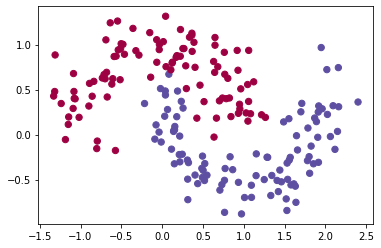

In [16]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [17]:
print(X.shape)
print(y.shape)

(200, 2)
(200, 1)


In [0]:
np.random.seed(3)

nn_params = initialize_nn(X, y, hidden_nodes=25)

In [19]:
history = []

for i in range(25000):

  result = forward_prop(X, nn_params, 'relu')

  loss = calculate_loss(result['A2'], y)
  history.append(loss)

  updates = backward_prop(X, y, nn_params, result, learning_rate=0.01, activation='relu')

  nn_params = update_weights(nn_params, updates, 0.01)

  if i%2500==0:
    print('Epoch: {}\tLoss: {}\tAccuracy:{}'.format(i, loss, accuracy_score(y, predict(nn_params, X, y))))

Epoch: 0	Loss: 1.9066348204293184	Accuracy:0.5
Epoch: 2500	Loss: 0.180387299131624	Accuracy:0.92
Epoch: 5000	Loss: 0.1359659874560818	Accuracy:0.945
Epoch: 7500	Loss: 0.10980537196168748	Accuracy:0.95
Epoch: 10000	Loss: 0.09204972346253007	Accuracy:0.975
Epoch: 12500	Loss: 0.07928338210331413	Accuracy:0.985
Epoch: 15000	Loss: 0.0698325282268611	Accuracy:0.985
Epoch: 17500	Loss: 0.06258409503854107	Accuracy:0.985
Epoch: 20000	Loss: 0.056664711168369374	Accuracy:0.985
Epoch: 22500	Loss: 0.051611980104390914	Accuracy:0.99


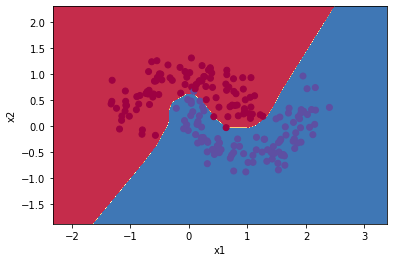

In [20]:
plot_decision_boundary(lambda x: predict(nn_params, x, y), X.T, y.T)